In [26]:
import sys

import pandas as pd

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [54]:
import os
import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from structs.res import AppRes

In [60]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 9

In [61]:
code = "7011"
dir_log = "20251123070123"
csv_log = "progress.csv"

In [62]:
res = AppRes()
path_dir_log = os.path.join("..", res.dir_log, code, dir_log)
list_dir_date = sorted(os.listdir(path_dir_log))
list_dir_date

['20251118', '20251119', '20251120']

In [63]:
list_df = list()
pattern1 = re.compile(r"(.{4})(.{2})(.{2})")
for dir_date in list_dir_date:
    if m := pattern1.match(dir_date):
        date_str = f"{m.group(1)}-{m.group(2)}-{m.group(3)}"
    else:
        date_str = "1970-01-01"
    # dt = pd.to_datetime(date_str)
    path_csv = os.path.join(path_dir_log, dir_date, csv_log)
    df_csv = pd.read_csv(path_csv)
    ser_ep_len_mean = df_csv["rollout/ep_len_mean"]
    n = len(ser_ep_len_mean)
    df_ep_len_mean = pd.DataFrame(
        {"date": [date_str] * n, "ep_len_mean": ser_ep_len_mean}
    )
    list_df.append(df_ep_len_mean)
df = pd.concat(list_df)
df.reset_index(inplace=True, drop=True)
df

,date,ep_len_mean
0,2025-11-18,233.250000
1,2025-11-18,237.294118
2,2025-11-18,242.440000
3,2025-11-18,250.562500
4,2025-11-18,261.051282
...,...,...
142,2025-11-20,1280.357143
143,2025-11-20,1305.239437
144,2025-11-20,1328.541667
145,2025-11-20,1328.541667


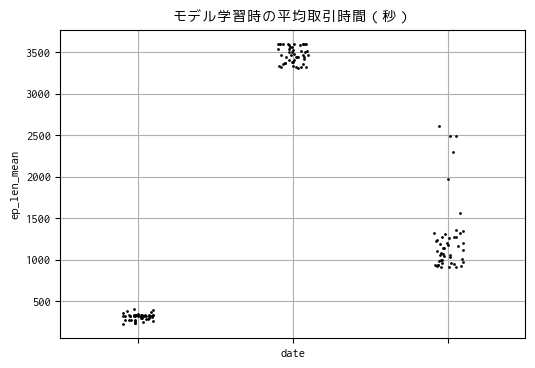

In [87]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.stripplot(data=df, x="date", y="ep_len_mean", s=2, c="black", ax=ax)
ax.tick_params(axis='x', labelbottom=False) # Remove x-axis tick labels
ax.grid()
ax.set_title("モデル学習時の平均取引時間（秒）")
plt.show()